<b><font size="6">|008|Linear Regression|Fuel Efficiency </font></b>

**Key Concepts:**
* Variable identification
* Data scaling
* Data "normalization"
* Multiple linear regression
* Regression Metrics

In [2]:
import numpy as np
import pandas as pd

from IPython.display import display 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load Data

Load the data into a pandas dataframe.

In [3]:
df = pd.read_csv('auto-mpg-Cleaned.csv')

# Inspecting the data

## Viewing some rows

The dataframe method **head()** will show the first 5 rows of the dataframe. These are the “header” rows.

In [4]:
display(df.head())

,cylinders,displacement_litre,power_kw,weight_ton,acceleration,model year,car name,kmperlitre
0,8,5.0,96,1.589,12.0,70,chevrolet chevelle malibu,7.65
1,8,5.7,121,1.675,11.5,70,buick skylark 320,6.38
2,8,5.2,110,1.559,11.0,70,plymouth satellite,7.65
3,8,5.0,110,1.557,12.0,70,amc rebel sst,6.80
4,8,4.9,103,1.564,10.5,70,ford torino,7.23


## Inspect information about the dataframe 

We can summarise the DataFrame that was imported using the **df.info()** method.

In [5]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cylinders           392 non-null    int64  
 1   displacement_litre  392 non-null    float64
 2   power_kw            392 non-null    int64  
 3   weight_ton          392 non-null    float64
 4   acceleration        392 non-null    float64
 5   model year          392 non-null    int64  
 6   car name            392 non-null    object 
 7   kmperlitre          392 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 24.6+ KB


None

## Dropping the Car Name

We won't need the name of the car, so we can drop that column from the dataframe.

In [6]:
df.drop("car name", axis = "columns", inplace=True)

# Variable Identification

The first task is to identify the input and output variables in the dataset. The output variable is variable that would ultimately need to be predicted. In this case it is the wine quality, defined by the **quality** column. All of the other columns can be regarded as inputs to a model.

we construct a list of the input and output variable names.

In [7]:
all_vars = df.columns
output_var_name = 'kmperlitre'
input_var_names = all_vars.drop(output_var_name).to_list()

df_inputs = df[input_var_names]
df_output = df[output_var_name]
print(f'There are {len(input_var_names)} Input Variables')
display(df_inputs)


There are 6 Input Variables


,cylinders,displacement_litre,power_kw,weight_ton,acceleration,model year
0,8,5.0,96,1.589,12.0,70
1,8,5.7,121,1.675,11.5,70
2,8,5.2,110,1.559,11.0,70
3,8,5.0,110,1.557,12.0,70
4,8,4.9,103,1.564,10.5,70
...,...,...,...,...,...,...
387,4,2.3,63,1.266,15.6,82
388,4,1.6,38,0.966,24.6,82
389,4,2.2,62,1.041,11.6,82
390,4,2.0,58,1.191,18.6,82


## The variables

Let's look a little more closely at the variables. Firstly we can simply inspect the data types of the variables.

In [8]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cylinders           392 non-null    int64  
 1   displacement_litre  392 non-null    float64
 2   power_kw            392 non-null    int64  
 3   weight_ton          392 non-null    float64
 4   acceleration        392 non-null    float64
 5   model year          392 non-null    int64  
 6   kmperlitre          392 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 21.6 KB


None

All the input variables are numerical, floating point numbers.

We can get some insights as to the numerical ranges of the variables through the descriprive statistics of the input data.

We will use the pandas method for calculating some basic descriptive statistics of all the numerical columns in the inputs dataframe using the dataframe **describe()** method.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,392.0,5.471939,1.705783,3.000,4.0000,4.0000,8.00000,8.000
displacement_litre,392.0,3.192092,1.711721,1.100,1.7000,2.5000,4.52500,7.500
power_kw,392.0,76.829082,28.304047,34.000,55.0000,68.5000,92.75000,169.000
weight_ton,392.0,1.350615,0.385283,0.732,1.0095,1.2715,1.63975,2.331
acceleration,392.0,15.541327,2.758864,8.000,13.7750,15.5000,17.02500,24.800
model year,392.0,75.979592,3.683737,70.000,73.0000,76.0000,79.00000,82.000
kmperlitre,392.0,9.967628,3.317975,3.830,7.2300,9.6750,12.33000,19.810


Looking at the min/max values we see that there are variables with vastly different ranges. If may be necessary to rescale all the input variables.

It is also useful to plot histograms of the input data. Here we are using the **seaborn** library to generate the plots. The **seaborn** function **histplot()** provides the histogram, together with an approximte curve of the distribution function. Thus us the "kde" (kernel density estimate) that will smooth the distribution.

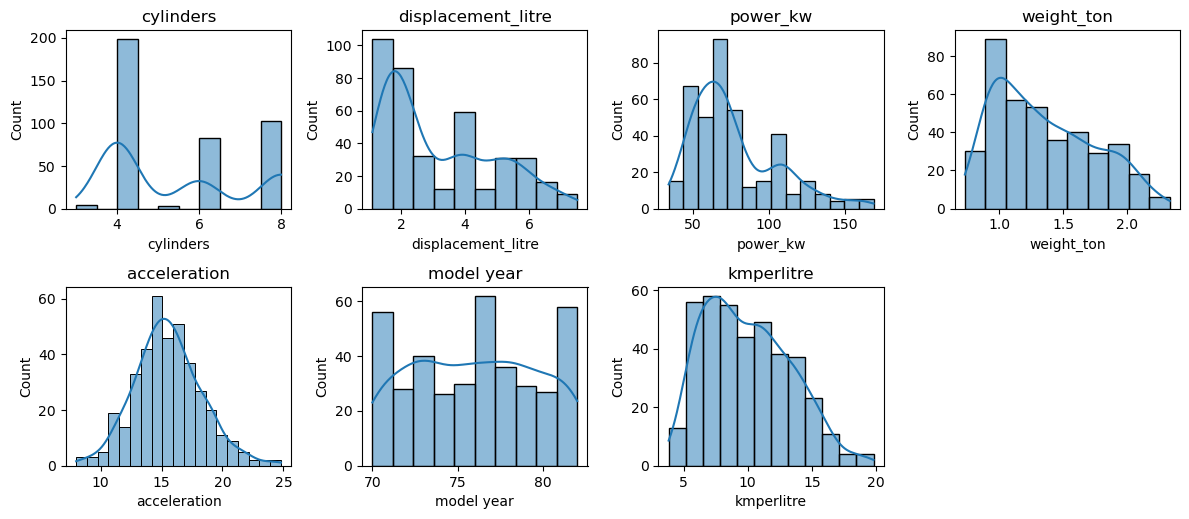

In [10]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Data manipulation & cleaning

## Scaling the variables

As noted earlier when looking at the descriptive statistics, we see that the input data contains variables with vastly different ranges. This becomes evident when we generate box plots of the input data as follows

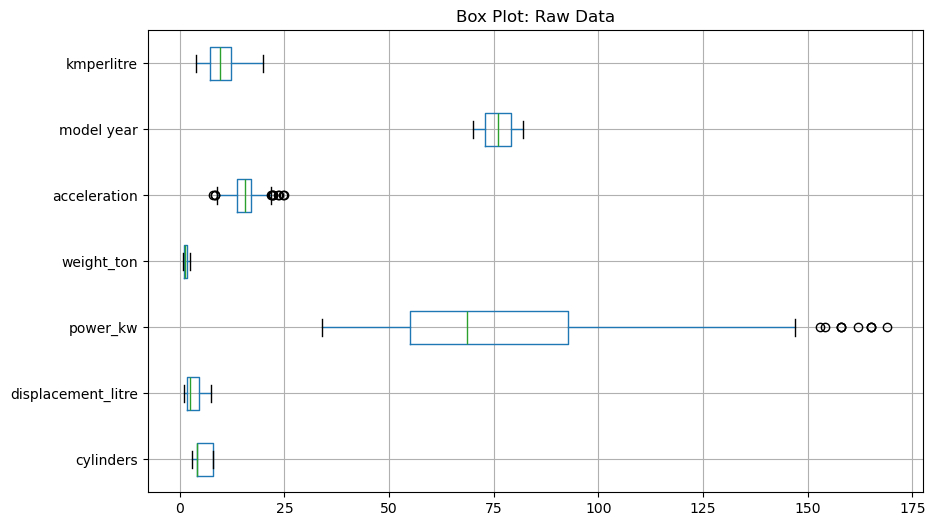

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df.boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

Some of the variables have a small range of numerical values, while other variables have a wide range. 
In many machine learning models, such widely different ranges of value create difficulties. It is usually beneficial to rescale the input variables so that their ranges are "similar".

### Scaling using simple scaling

We will drop the model-year from the dataframe, since it should not affect the performance.
 - We will scale the power_kw variable by simply dividing by 10.
 - We will scale the weight_ton variable by simply multiplying  by 5.


**Note:** One can use  use the function, **MinMaxScaler()** or other scaling functions to scale all the variables. 


In [12]:
# quant_var_names = df.columns.drop("origin").to_list()
df_scaled = df.copy()
df_scaled.drop("model year", axis = "columns", inplace=True)

df_scaled["power"] = df_scaled["power_kw"]/10
df_scaled["weight"] = df_scaled["weight_ton"]*5

df_scaled.drop(["power_kw", "weight_ton"], axis = "columns", inplace=True)

display(df_scaled.describe().T)

,count,mean,std,min,25%,50%,75%,max
cylinders,392.0,5.471939,1.705783,3.00,4.0000,4.0000,8.00000,8.000
displacement_litre,392.0,3.192092,1.711721,1.10,1.7000,2.5000,4.52500,7.500
acceleration,392.0,15.541327,2.758864,8.00,13.7750,15.5000,17.02500,24.800
kmperlitre,392.0,9.967628,3.317975,3.83,7.2300,9.6750,12.33000,19.810
power,392.0,7.682908,2.830405,3.40,5.5000,6.8500,9.27500,16.900
weight,392.0,6.753074,1.926417,3.66,5.0475,6.3575,8.19875,11.655


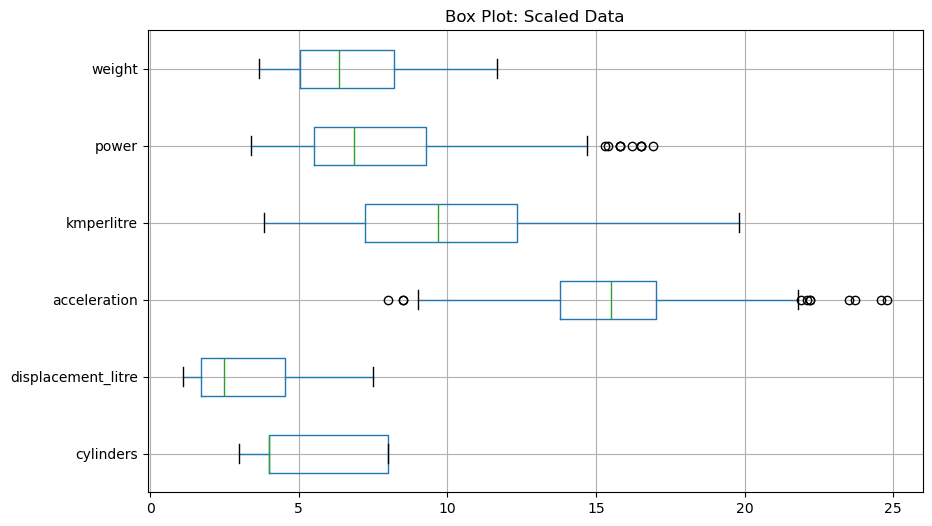

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = df_scaled.boxplot(vert = 0, ax=ax)  
_ = ax.set_title(f'Box Plot: Scaled Data')

We now see that all the variables are of the same order of magnitude.

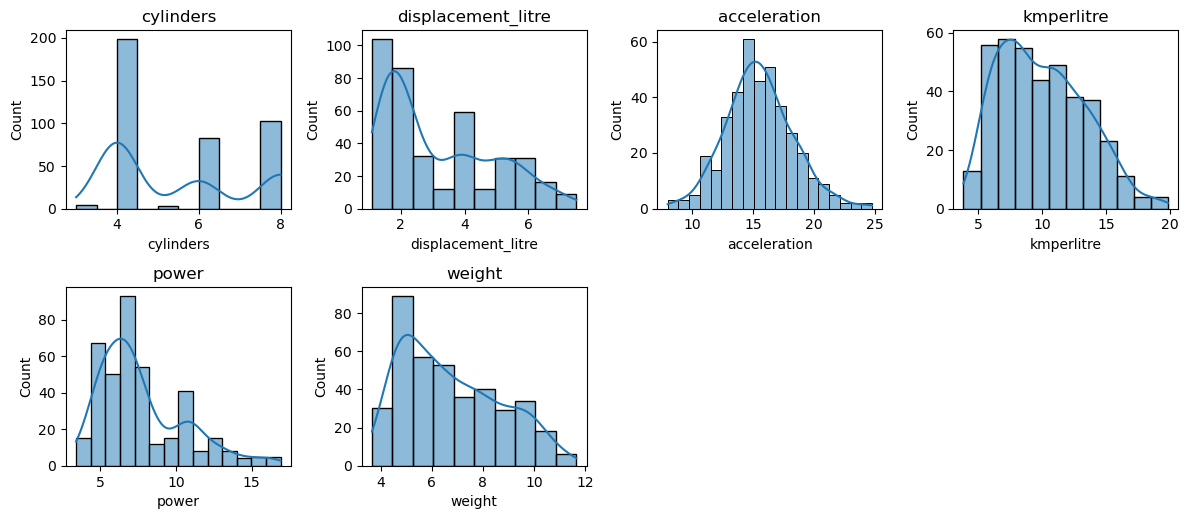

In [14]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_scaled[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

Looking at the distributions, we see that some of the variables are right-skewed. Let's try to "normalize" those variables

## Transformations

In [15]:
df_tx = df_scaled.copy()

### Right Skewed Distributions

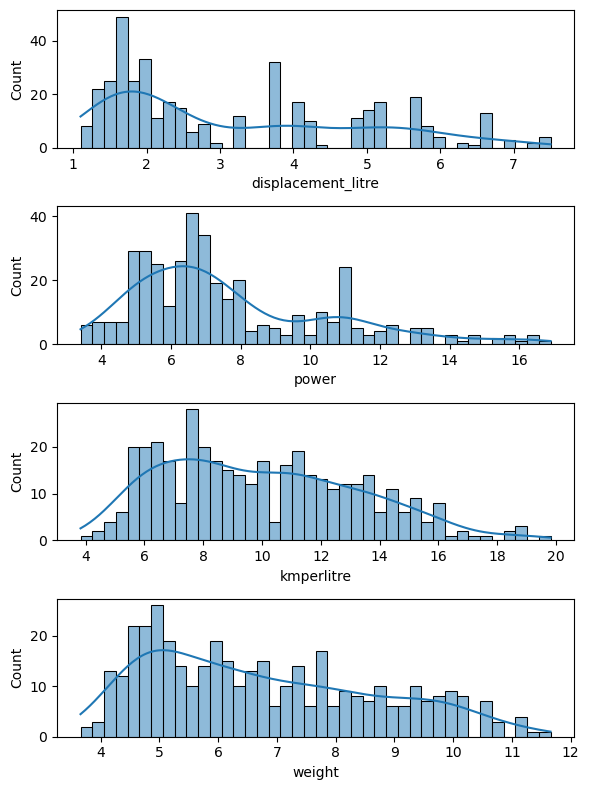

In [16]:
right_skewed = ["displacement_litre", "power", "kmperlitre", "weight"]

plt.figure(figsize=(6, 8))
for i, col in enumerate(right_skewed):
    plt.subplot(len(right_skewed), 1, i+1)
    sns.histplot(df_scaled[col], kde=True, bins=40)
plt.tight_layout()
plt.show()


In [17]:
for i, col in enumerate(right_skewed):
    df_tx[col] = np.sqrt(df_scaled[col])

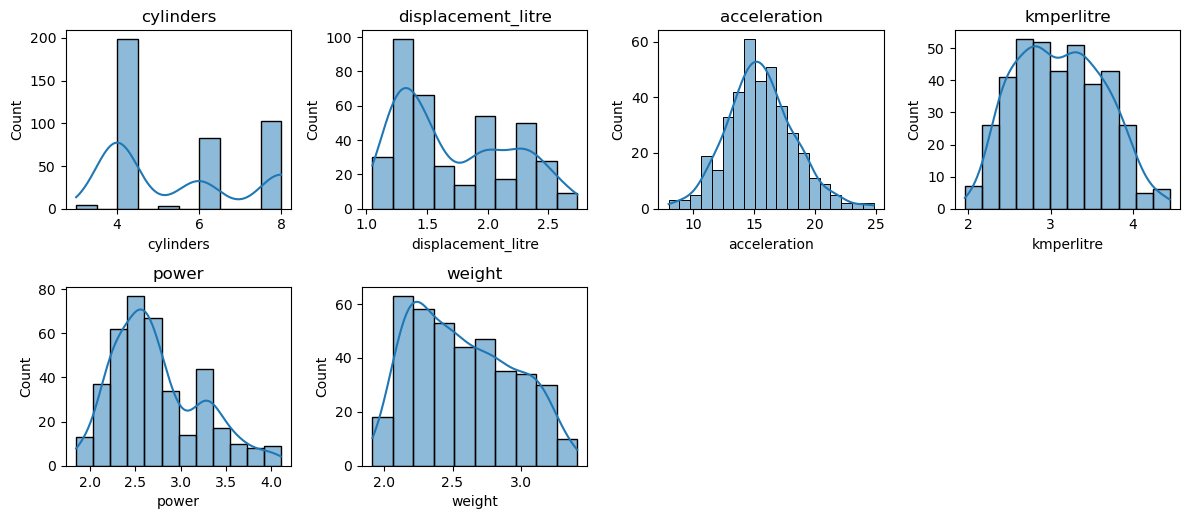

In [18]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df_tx.columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_tx[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Exploratory Data Analysis 

In [19]:
def CorrPlot(df, dropDuplicates = True, figsize = (8, 6)):
    # df = df.corr()
    df = np.abs(df.corr())
    # Exclude duplicate correlations by masking upper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
    # Set background color / chart style
    sns.set_style(style = 'white')
    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=figsize)
    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)
    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                    annot=True,
                    square=True,
                    linewidth=.5, cbar_kws={"shrink": .75}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                annot=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)

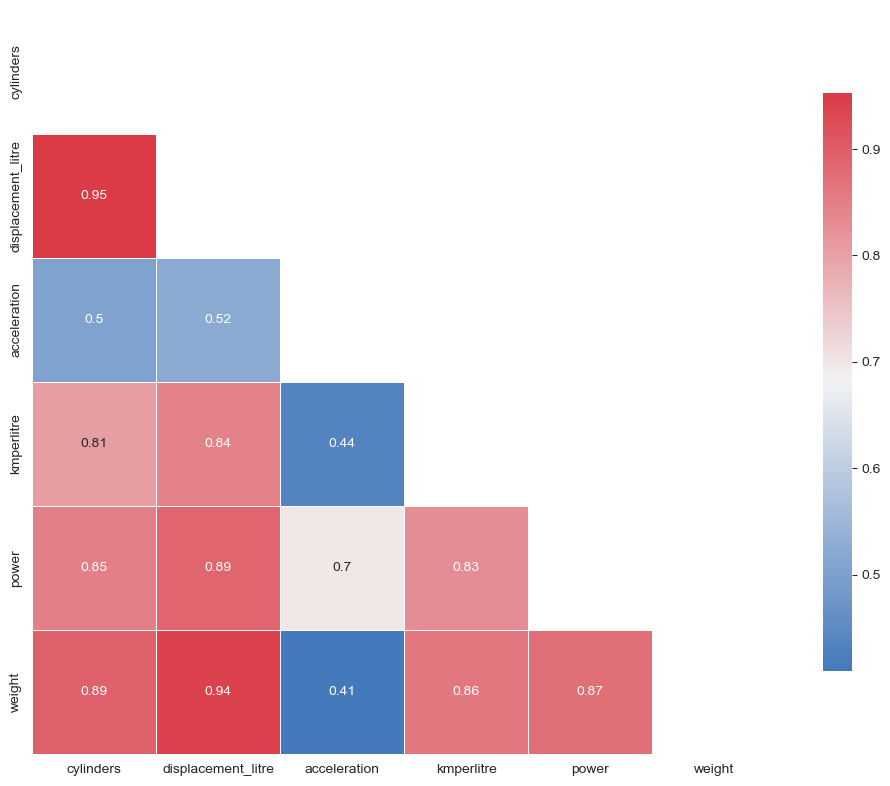

In [20]:
CorrPlot(df_tx, figsize = (12, 10))

We see that the **acceleration** variable has the lowest correlation coefficient. We may want to exclude this variable as a feature.

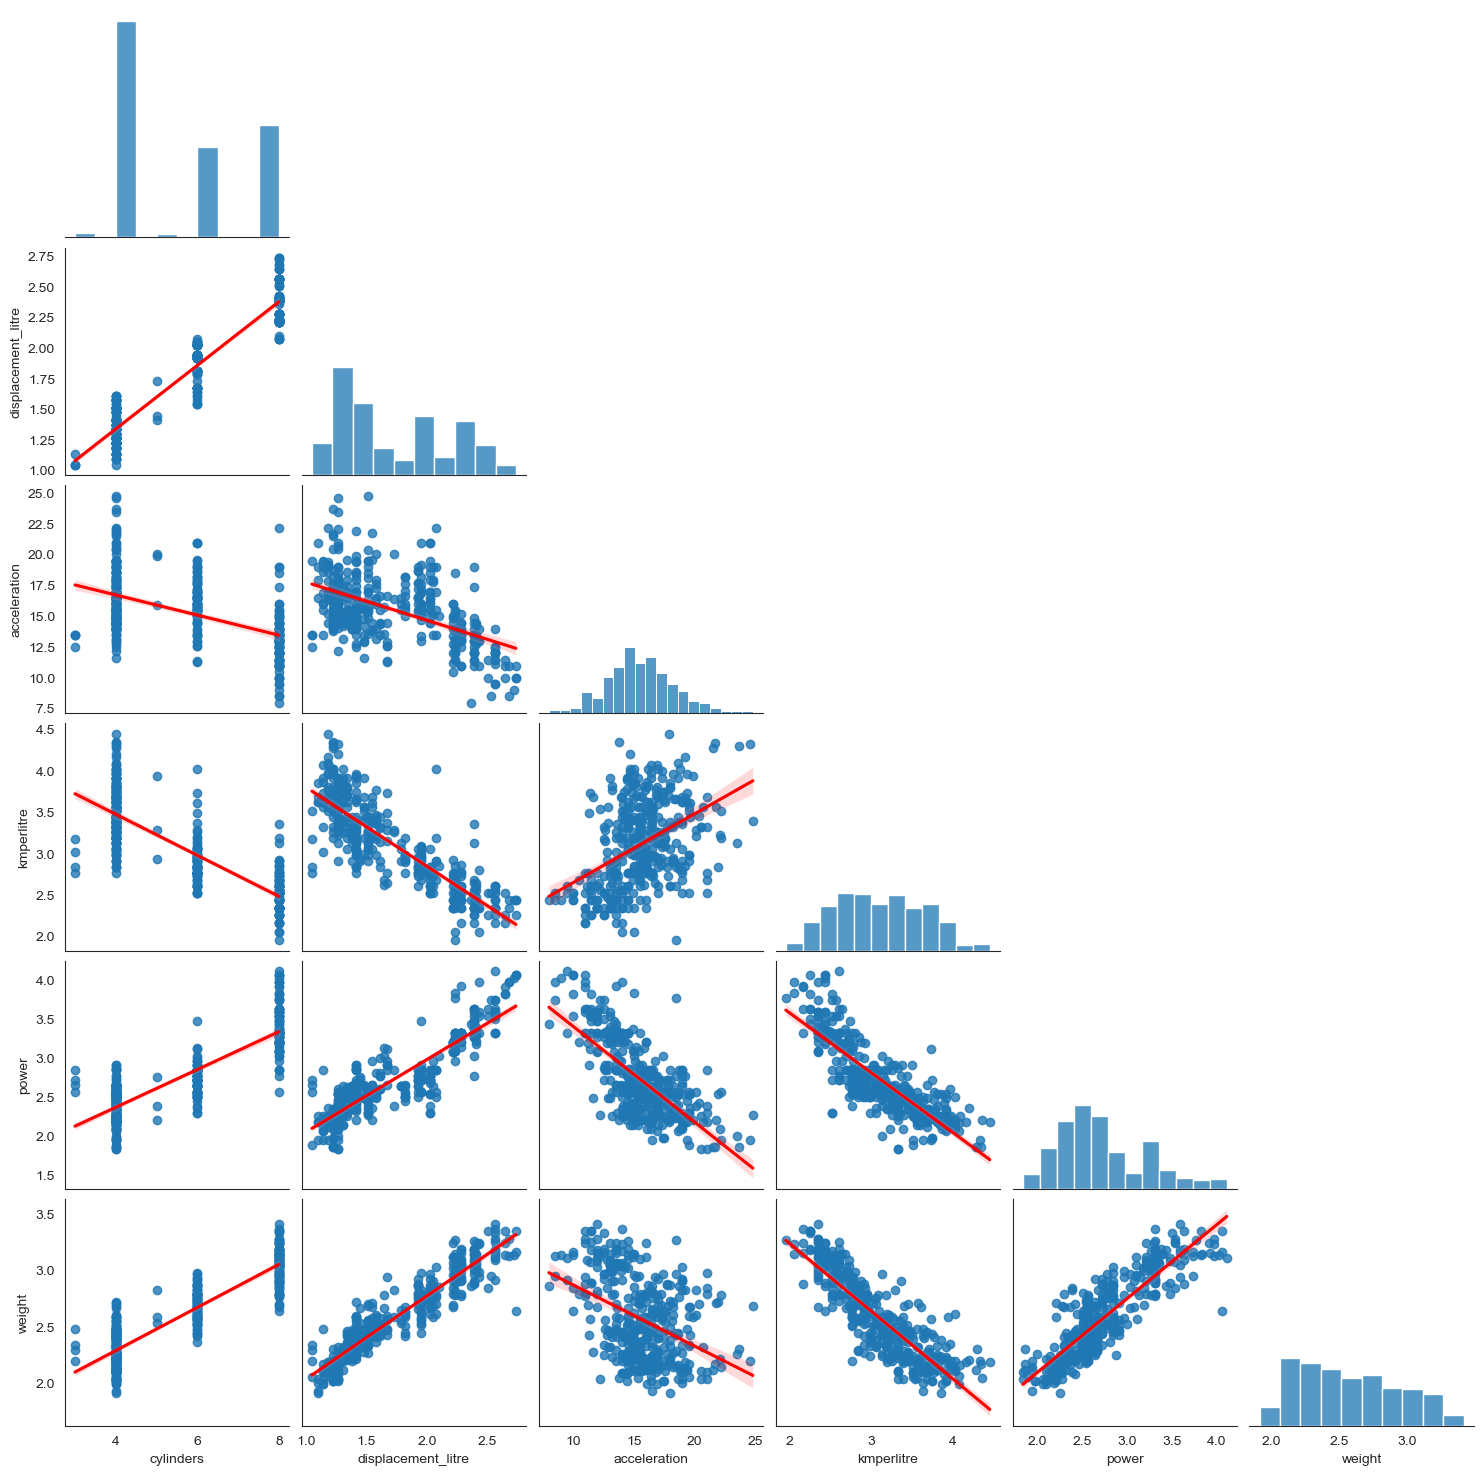

In [21]:
_ = sns.pairplot(df_tx, corner=True, kind="reg", plot_kws={'line_kws':{'color':'red'}})

# Model

## Extract features & define input and output variables

In [22]:
features = df_tx.columns.drop( "kmperlitre").to_list()
X = df_tx[features]
y = df_tx["kmperlitre"]
display(X, y)

,cylinders,displacement_litre,acceleration,power,weight
0,8,2.236068,12.0,3.098387,2.818688
1,8,2.387467,11.5,3.478505,2.893959
2,8,2.280351,11.0,3.316625,2.791953
3,8,2.236068,12.0,3.316625,2.790161
4,8,2.213594,10.5,3.209361,2.796426
...,...,...,...,...,...
387,4,1.516575,15.6,2.509980,2.515949
388,4,1.264911,24.6,1.949359,2.197726
389,4,1.483240,11.6,2.489980,2.281447
390,4,1.414214,18.6,2.408319,2.440287


0      2.765863
1      2.525866
2      2.765863
3      2.607681
4      2.688866
         ...   
387    3.388215
388    4.325506
389    3.687818
390    3.449638
391    3.630427
Name: kmperlitre, Length: 392, dtype: float64

## Split data into training and test

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)

## Training the model

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Evaluation

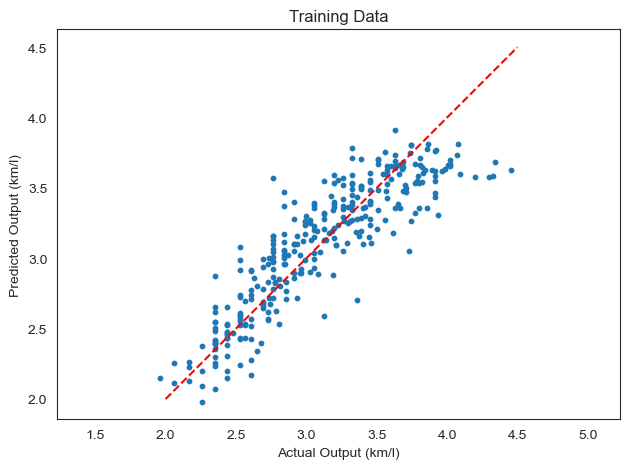

In [32]:
plt.scatter(y_train, y_train_pred, s=10)
plt.plot([2, 4.5], [2,4.5], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output (km/l)')
plt.ylabel('Predicted Output (km/l)')
plt.axis('equal')
plt.title('Training Data')
plt.tight_layout()

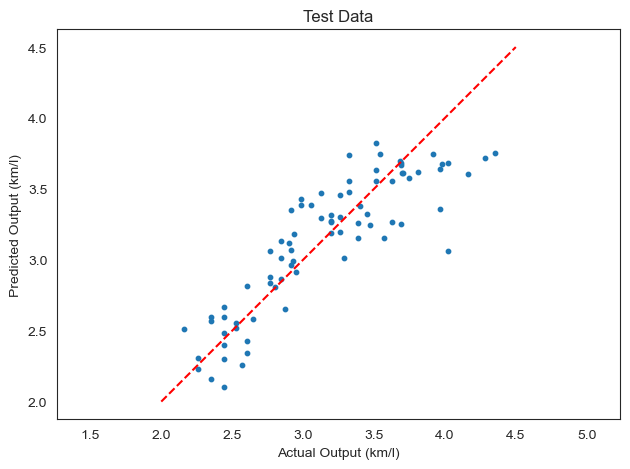

In [33]:
plt.scatter(y_test, y_test_pred, s=10)
plt.plot([2, 4.5], [2,4.5], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output (km/l)')
plt.ylabel('Predicted Output (km/l)')
plt.axis('equal')
plt.title('Test Data')
plt.tight_layout()

## Calculating the metrics

In [34]:
train_mae =  np.round(mean_absolute_error(y_train, y_train_pred),3 )
train_mse =  np.round(mean_squared_error(y_train, y_train_pred),3)
train_rmse = np.round(np.sqrt(train_mse),3)

print('COMPARISON OF METRICS - TRAINING DATA')
print(f'Training MAE   : {train_mae}')
print(f'Training MSE   : {train_mse}')
print(f'Training RMSE  : {train_rmse}')

COMPARISON OF METRICS - TRAINING DATA
Training MAE   : 0.188
Training MSE   : 0.06
Training RMSE  : 0.245


In [35]:
test_mae =  np.round(mean_absolute_error(y_test, y_test_pred),3) 
test_mse =  np.round(mean_squared_error(y_test, y_test_pred),3)
test_rmse = np.round(np.sqrt(test_mse),3)

print('COMPARISON OF METRICS - TEST DATA')
print(f'Testing MAE   : {test_mae}')
print(f'Testing MSE   : {test_mse}')
print(f'Testing RMSE  : {test_rmse}')

COMPARISON OF METRICS - TEST DATA
Testing MAE   : 0.209
Testing MSE   : 0.074
Testing RMSE  : 0.272
